## Project 1

You recently concluded phase I studies on image enhancements with OpenCV and you discovered a graduate intern job opening at Meta, formally named Facebook. The first requirement for making the application is to develop a program that combines all the techniques you have learned in image enhancement with a portrait image of 10 members of your class group. Should you choose to begin the development process, let the program request the username and matno. for login, and the enhancement techniques available to choose from that will perform the task. 

Enter your username:  lotanna
Enter your matric no:  888


Welcome lotanna, You can perform any of the following enhancement techniques.
1. Addition of images
2. Adjust Brightness & Contrast
3. Sharpening
4. Removing Noise
5. Image Scaling
6. Inverse Transformation


Enter your response:  3


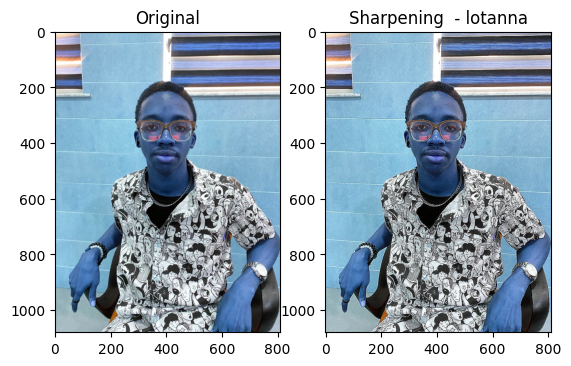

In [36]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

students = {
    "aj":"aj.jpg",
    "david":"david.jpg",
    "fatima":"fatima.jpg",
    "george": "george.jpg",
    "juba": "juba.jpg",
    "kobi": "kobi.jpg",
    "lala":"lala.jpg",
    "lotanna": "lotanna.jpg",
    "sophia":"sophia.jpg",
    "zion":"zion.jpg"
}

passwords = {
    "aj":111,
    "david": 222,
    "fatima":333,
    "george": 444,
    "juba": 555,
    "kobi": 666,
    "lala":777,
    "lotanna": 888,
    "sophia":999,
    "zion":419
}


def image_addition(img):
    # path to input images
    image1 = cv2.imread("img/"+ img)
    image2 = cv2.imread('img/background.jpeg')
    
    #resize images
    image1 = cv2.resize(image1, (500,400))
    image2 = cv2.resize(image2, (500, 400))
    
    # cv2.addweighted with applied parameters
    addImage = cv2.addWeighted(image1, 0.9, image2, 0.5, 0)

    plt.subplot(1, 3, 1)
    plt.title("Image 1")
    plt.imshow(image1)

    plt.subplot(1, 3, 2)
    plt.title("Image 2")
    plt.imshow(image2)

    plt.subplot(1, 3, 3)
    plt.title("Added Images")
    plt.imshow(addImage)


    # #window showing output image
    # cv2.imshow('Weighted Image', addImage)
    
    # # De-allocate any associated memory usage
    # if cv2.waitKey(0) &0xff ==27:
    #     cv2.destroyAllWindows()

def adjust_brightness_contrast(img):
    image = cv2.imread("img/"+ img)
    #Plt the original image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)
    
    #Adjust the brightness and contrast
    brightness = 5
    contrast = 1.5
    image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)
    
    #Save the image
    cv2. imwrite(f'img/contrast__{img.split(".", 1)[0]}.jpg', image2)
    
    #Plot the contrast image
    plt.subplot(1,2,2)
    plt.title(f"Brightness and Contrast - {img.split('.', 1)[0]}")
    plt.imshow(image2)
    plt.show()

def sharpen(img):
    image = cv2.imread("img/"+ img)
    
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(image)

    #Sharpening kernel
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    #Sharpen image
    sharpened_image = cv2.filter2D(image, -1, kernel)

    cv2.imwrite(f'img/sharpened_{img.split(".", 1)[0]}.jpg', sharpened_image)

    #sharpened image
    plt.subplot(1, 2, 2)
    plt.title(f"Sharpening  - {img.split('.', 1)[0]}")
    plt.imshow(sharpened_image)
    plt.show()

def removing_noise(img):
    image = cv2.imread("img/" + img)

    #Original
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    #Remove noise
    filtered_image = cv2.medianBlur(image, 15)

    cv2.imwrite(f'img/Median-Blur_{img.split(".", 1)[0]}.jpg', filtered_image)

    plt.subplot(1,2,2)
    plt.title(f"Median Blur - {img.split('.', 1)[0]}")
    plt.imshow(filtered_image)
    plt.show()
    
    
def scale_image(img):
    image = cv2.imread("img/" + img)

    #Original
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)

    #Remove noise
    scaled_image = cv2.resize(image, None, fx=2, fy=2)

    cv2.imwrite(f"img/Scaled_{img.split('.', 1)[0]}.jpg", scaled_image)

    plt.subplot(1,2,2)
    plt.title(f"Scaled - {img.split('.', 1)[0]}")
    plt.imshow(scaled_image)
    plt.show()

def inverse_transformation(img):
    image = cv2.imread("img/" + img)

    # plot original
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)
    
    inverse_image = 255 - image
    
    cv2.imwrite(f"img/reverse_image_{img.split('.', 1)[0]}.jpg", inverse_image)
    
    plt.subplot(1, 2, 2)
    plt.title(f"Inverse Color - {img.split('.', 1)[0]}")
    plt.imshow(inverse_image)
    plt.show()
    
    
def login():
    username = input("Enter your username: ").lower()
    matno = int(input("Enter your matric no: "))
    
    if username in students:
        correct_password = passwords[username]
        if correct_password == matno:
            img = students[username] 
            print(f"Welcome {username}, You can perform any of the following enhancement techniques.")
            print("1. Addition of images")
            print("2. Adjust Brightness & Contrast")
            print("3. Sharpening")
            print("4. Removing Noise")
            print("5. Image Scaling")
            print("6. Inverse Transformation")
    
            # Selecting the appropriate technique
            technique = int(input("Enter your response: "))
            if technique == 1:
                image_addition(img)
            elif technique == 2:
                adjust_brightness_contrast(img)
            elif technique == 3:
                sharpen(img)
            elif technique == 4:
                removing_noise(img)
            elif technique == 5:
                scale_image(img)
            elif technique == 6:
                inverse_transformation(img)
            else:
                print("You selected an invalid option")
        else:
            print("Incorrect Matric Number! Try again")
    else:
        print("This username is not registered in our database! Try again")



login()
